# Reinforcement Learning

------------------------------------------------------------------------------------------------------------------------------------
Quantum Finance - Apresentação/Estudo de aplicação em Reinforcement Learning (Turma 9DTSR)

------------------------------------------------------------------------------------------------------------------------------------

Integrantes:

    1) RM357067 - Edinaldo Rodrigues de Oliveira Junior
    2) RM358158 - Henrique Cardoso
    3) RM358067 - Jefferson de Souza Santos
    4) RM357344 - Walace Vinicius Silva dos Santos

------------------------------------------------------------------------------------------------------------------------------------

## O que deve ser apresentado?

Ao final da disciplina deverá ser apresentado o planejamento de uma aplicação ou então pesquisa com relação a um problema em específico, se utilizando de Aprendizagem por Reforço (RL).

O problema a ser solucionado via Reinforcement Learning é o seguinte:

A QuantumFinance deseja criar um fundo automatizado para operar três ativos: Vale, Petrobrás e Brasil Foods. O objetivo é desenvolver e simular um agente de Reinforcement Learning (RL) capaz de tomar decisões financeiras, como compra, venda ou manutenção de posição, com base em dados históricos.

### Tarefas:

    - Definir o Problema de RL: Identificar estados, ações e recompensas no contexto financeiro.

    - Implementar ou apresentar exemplo de aplicação do Agente de RL: Escolher um algoritmo de RL (ex.: Q-Learning ou DQN) e aplicá-lo para treinar o agente utilizando os dados históricos.

    - Avaliação do Desempenho: Descrever ou simular o comportamento do agente e, se possível, analisar os resultados com métricas financeiras relevantes (lucro, sharpe ratio, etc.).

    - Entregáveis: Relatório explicativo com desenho do agente, resultados obtidos e insights; Se aplicável, código-fonte com a implementação e simulações realizadas.


### As equipes devem atentar para os seguintes pontos:

- Ingestão de dados - Quais seriam os dados a serem utilizados para resolver o problema em questão, conseguem mostrar exemplos de como estão dispostos esses dados de alguma forma? Há bases que podem ser utilizadas em um problema de RL?  (Dica: pesquisar uma aplicação/problema em algum site de pesquisa de datasets como https://datasetsearch.research.google.com/, https://www.kaggle.com/ ou no https://paperswithcode.com/task/reinforcement-learning-1).

- Processamento: Têm exemplos de como esse problema/aplicação tem sido implementado? Que tipo de algoritmo é mais utilizado? Tem como exemplificar o funcionamento de alguma forma?  (Dica: tem muita coisa legal em repositórios no github como  o https://github.com/aikorea/awesome-rl).

- Saída do processo: Qual a saída do processo? Qual o objetivo do agente no caso escolhido? Negociar um ativo ao melhor preço? Criar um documento com feedback humano para os analistas?

- Sugiro estruturar o trabalho tendo por base os seguintes tópicos:

    - Introdução e Problemática;
    - Motivação e Objetivo;
    - Apresentação da aplicação estudada/estrutura;
    - Considerações e Potencial.

## Avaliação:

- Material escrito entregue (de preferência slides, vídeo com breve apresentação etc.);
- Aderência aos pontos;
- Avaliação de código/aplicação, se aplicável;
- Originalidade, “fit” para com o perfil do curso/alunos e “doability”.

# 1. Instalação de Bibliotecas

In [1]:
# Bibliotecas padrão
import random
from collections import deque

# Demais bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from   scipy.signal import savgol_filter
from   sklearn.preprocessing import MinMaxScaler

# 2. Definição de parametros

In [2]:
data_inicio = '2024-04-01'

# 3. Data Preparation

**Leitura dos Dados:**
- Carrega o arquivo CSV com os dados históricos da empresa Vale.
- A fonte de dados contém colunas como data e preço de fechamento da ação.

**Verificação e Tratamento de Valores Nulos:**
- Verifica se há valores nulos no dataset.
- Utiliza o método bfill() (backward fill) para preencher nulos com o próximo valor válido.

**Seleção e Filtragem de Colunas:**
- Seleciona apenas as colunas Date (data) e Close (preço de fechamento).
- Filtra os dados para incluir apenas registros a partir de 1º de abril de 2024.
- Garante que uma cópia independente seja criada com .copy().

**Suavização do Preço de Fechamento**
- Cria um gráfico com a evolução dos preços da ação ao longo do tempo.
- Compara visualmente os dados brutos (Close) com os valores suavizados.
- Usa estilos diferentes para facilitar a distinção: linha cinza pontilhada para os dados originais e linha dourada sólida para os suavizados.

## 3.1 Vale

In [3]:
#Leitura dos dados
vale = pd.read_csv('/Users/jeffsantos/Desktop/9DTSR/git/9DTSR/Reinforcement Learning/Trabalho Integrado/vale.csv')

#Análise de nulos
print('Null Values =',vale.isnull().values.any())
vale=vale.bfill()

#Seleção de colunas
df_vale = vale[['Date', 'Close']][vale['Date'] >= data_inicio].copy()
df_vale.head(5)

Null Values = False


,Date,Close
1054,2024-04-01,56.340973
1055,2024-04-02,57.003590
1056,2024-04-03,56.184521
1057,2024-04-04,55.558712
1058,2024-04-05,54.951317


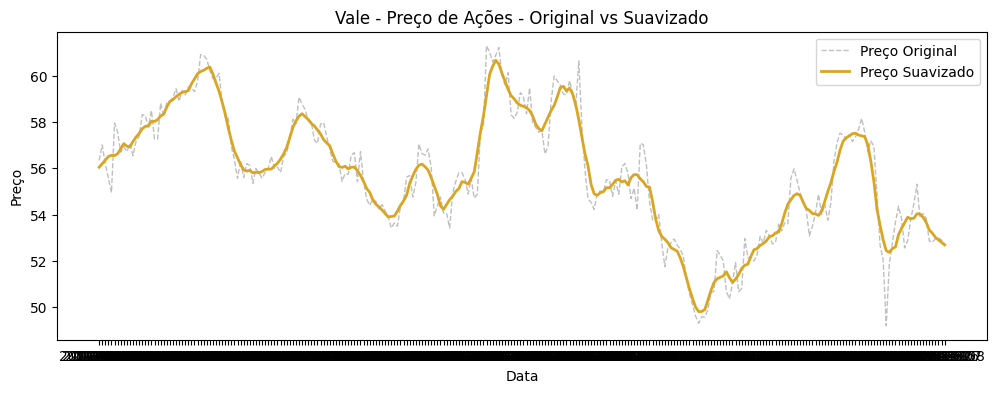

In [4]:
#Suavização dos dados para treinamento
df_vale['preco_suavizado'] = savgol_filter(df_vale['Close'], window_length=7, polyorder=1)

#Visualização dos dados
plt.figure(figsize=(12, 4))
plt.plot(df_vale['Date'], df_vale['Close'], label='Preço Original', alpha=0.5, color='gray', linewidth=1, linestyle='--')
plt.plot(df_vale['Date'], df_vale['preco_suavizado'], label='Preço Suavizado', color='#DAA520', linewidth=2, linestyle='-')
plt.legend()
plt.title('Vale - Preço de Ações - Original vs Suavizado', fontsize=12)
plt.xlabel('Data')
plt.ylabel('Preço')
plt.show()

## 2.2 Petrobras

In [5]:
#Leitura dos dados
petro = pd.read_csv('/Users/jeffsantos/Desktop/9DTSR/git/9DTSR/Reinforcement Learning/Trabalho Integrado/petro.csv')

#Análise de nulos
print('Null Values =',petro.isnull().values.any())
petro=petro.bfill()

#Seleção de colunas
df_petro = petro[['Date', 'Close']][petro['Date'] >= data_inicio].copy()
df_petro.head(5)


Null Values = False


,Date,Close
1054,2024-04-01,31.168547
1055,2024-04-02,31.971558
1056,2024-04-03,31.805988
1057,2024-04-04,31.441732
1058,2024-04-05,31.541075


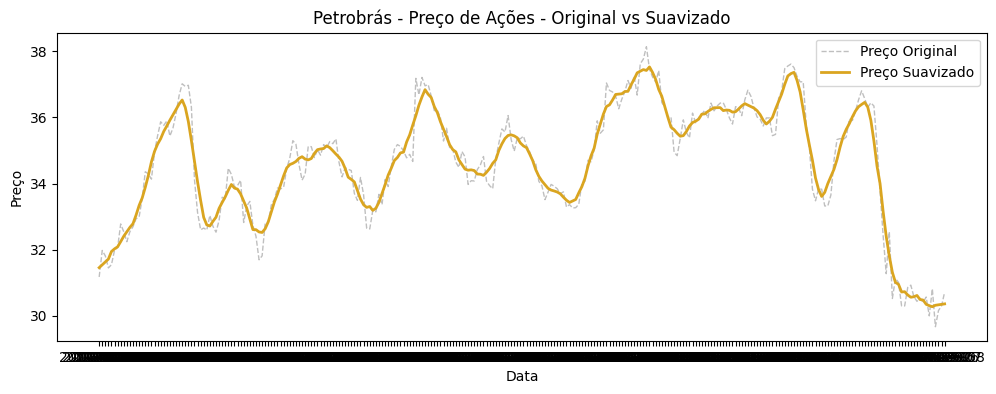

In [6]:
#Suavização dos dados para treinamento
df_petro['preco_suavizado'] = savgol_filter(df_petro['Close'], window_length=7, polyorder=1)

#Visualização dos dados
plt.figure(figsize=(12, 4))
plt.plot(df_petro['Date'], df_petro['Close'], label='Preço Original', alpha=0.5, color='gray', linewidth=1, linestyle='--')
plt.plot(df_petro['Date'], df_petro['preco_suavizado'], label='Preço Suavizado', color='#DAA520', linewidth=2, linestyle='-')
plt.legend()
plt.title('Petrobrás - Preço de Ações - Original vs Suavizado', fontsize=12)
plt.xlabel('Data')
plt.ylabel('Preço')
plt.show()

## 2.3 BR Foods

In [7]:
#Leitura dos dados
brfoods = pd.read_csv('/Users/jeffsantos/Desktop/9DTSR/git/9DTSR/Reinforcement Learning/Trabalho Integrado/brfood.csv')

#Análise de nulos
print('Null Values =',brfoods.isnull().values.any())
brfoods=brfoods.bfill()

#Seleção de colunas
df_brfoods = brfoods[['Date', 'Close']][brfoods['Date'] >= data_inicio].copy()
df_brfoods.head(5)


Null Values = False


,Date,Close
1054,2024-04-01,15.566506
1055,2024-04-02,15.537319
1056,2024-04-03,15.585965
1057,2024-04-04,15.537319
1058,2024-04-05,15.731901


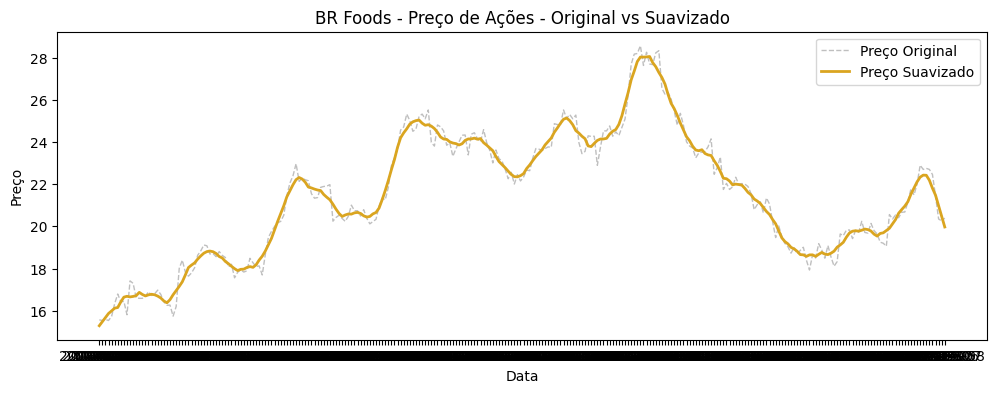

In [8]:
#Suavização dos dados para treinamento
df_brfoods['preco_suavizado'] = savgol_filter(df_brfoods['Close'], window_length=7, polyorder=1)

#Visualização dos dados
plt.figure(figsize=(12, 4))
plt.plot(df_brfoods['Date'], df_brfoods['Close'], label='Preço Original', alpha=0.5, color='gray', linewidth=1, linestyle='--')
plt.plot(df_brfoods['Date'], df_brfoods['preco_suavizado'], label='Preço Suavizado', color='#DAA520', linewidth=2, linestyle='-')
plt.legend()
plt.title('BR Foods - Preço de Ações - Original vs Suavizado', fontsize=12)
plt.xlabel('Data')
plt.ylabel('Preço')
plt.show()

# 4. Creating a Model

## 4.1 Criando o ambiente

**Classe `TradingEnvironment`:**
- Implementa um ambiente personalizado para treinamento de algoritmos de aprendizado por reforço em um cenário de negociação de ações.

**Inicialização (`__init__`):**
- Recebe os dados de preços e um saldo inicial (default: 10.000).
- Usa `reset_index(drop=True)` para garantir que os índices estejam limpos e sequenciais.
- Chama `reset()` para configurar o ambiente para o início de um novo episódio.

**Reset do Ambiente (`reset`):**
- Reinicia os valores-chave do portfólio:
  - Saldo em caixa (`balance`)
  - Ações em posse (`shares_held`)
  - Etapa atual no tempo (`current_step`)
- Define `current_step = 5` para permitir cálculo da média móvel de 5 períodos sem gerar erro (evita acessar índices negativos).
- Define `initial_price` como o primeiro preço do dataset para ser usado na normalização dos dados ao longo do episódio.

**Construção do Estado (`_get_state`):**
- O vetor de estado é cuidadosamente projetado para capturar:
  - Indicadores de mercado: médias móveis (3 e 5 períodos) e volatilidade.
  - Condição do portfólio: saldo, número de ações e preço atual.
  - Contexto histórico: normalização dos últimos 3 preços em relação ao preço atual.
- Todas as variáveis são **normalizadas** para estabilizar o aprendizado:
  - Por exemplo, `price_norm = price / initial_price` torna o preço relativo à primeira observação.

**Execução de Ações (`step`):**
- A ação pode ser:
  - `0` = Comprar
  - `1` = Vender
  - `2` = Manter posição
- Regras de decisão:
  - A compra é realizada com todo o saldo disponível.
  - A venda é total (liquidação completa das ações).
  - A manutenção não altera o portfólio.
- Penalidades leves são aplicadas para ações inválidas (ex: tentar comprar sem saldo, vender sem ações).

**Sistema de Recompensas:**
- A recompensa é uma **combinação ponderada** de:
  - Lucro incremental no passo atual (`delta_current`)
  - Lucro acumulado total (`delta_total`)
- A ênfase em `delta_total` (90%) encoraja o agente a **maximizar o desempenho geral**, não apenas ganhos pontuais.
- Ao final do episódio, uma recompensa extra proporcional ao retorno total é concedida, ponderada pelo tamanho do dataset.

**Decisões de Projeto Notáveis:**
- **Histórico limitado (3 dias e 5 dias)**: reduz dimensionalidade do estado e foca no comportamento recente do mercado.
- **Recompensa densa e contínua**: ajuda a orientar o aprendizado mesmo quando ações têm pouco impacto direto imediato.
- **Normalizações cuidadosas**: visam evitar escalas muito distintas entre variáveis (ex: preço x número de ações), algo crucial para estabilidade em RL.
- **Estrutura simples e extensível**: o ambiente é modular e pode ser facilmente expandido com novos indicadores ou políticas de execução.

**Retorno da Função `step`:**
- `state`: novo estado do ambiente.
- `reward`: valor de recompensa atribuída à ação.
- `done`: booleano indicando se o episódio terminou.
- `{}`: dicionário adicional para compatibilidade com Gym (pode ser usado para debug ou logging no futuro).


In [9]:
class TradingEnvironment:
    def __init__(self, data, initial_balance=10000):
        self.data = data.reset_index(drop=True)
        self.initial_balance = initial_balance
        self.reset()
    
    def reset(self):
        self.balance = self.initial_balance
        self.shares_held = 0
        self.current_step = 5  # Começa em 5 para permitir ma_5
        self.done = False
        self.total_profit = 0
        self.invalid_action = False
        self.portfolio_value = self.initial_balance
        self.initial_price = self.data.iloc[0]
        return self._get_state()   
    
    def _get_state(self):
        price = self.data.iloc[self.current_step]
        
        # Histórico de preços (variação percentual dos últimos 3 dias)
        past_prices = self.data.iloc[self.current_step-3:self.current_step].values
        price_history = (past_prices / price) - 1  # Normalizado em torno de 0

        # Médias móveis e volatilidade (normalizadas pelo preço atual)
        ma_3 = np.mean(past_prices) / price
        ma_5 = np.mean(self.data.iloc[self.current_step-5:self.current_step]) / price
        volatility = np.std(past_prices) / price

        # Normalizações
        price_norm = price / self.initial_price
        balance_norm = self.balance / self.initial_balance
        shares_norm = self.shares_held / 1000  # ajuste se necessário

        # Vetor final do estado
        state = np.array(
            [price_norm, balance_norm, shares_norm, ma_3, ma_5, volatility] + list(price_history),
            dtype=np.float32
        )
        return state
    
    def step(self, action):
        price = self.data.iloc[self.current_step]
        reward = 0

        prev_portfolio_value = self.balance + self.shares_held * price
        
        if action == 0:  # Comprar
            max_shares = int(self.balance // price)
            if max_shares > 0:
                total_cost = max_shares * price
                self.shares_held += max_shares
                self.balance -= total_cost
            else:
                self.invalid_action = True
                reward += 1
        
        elif action == 1:  # Vender
            if self.shares_held > 0:
                total_revenue = self.shares_held * price
                self.balance += total_revenue
                self.shares_held = 0
            else:
                self.invalid_action = True
                reward += 1
        
        self.current_step += 1
        if self.current_step >= len(self.data) - 1:
            self.done = True
        
        current_price = self.data.iloc[self.current_step]
        self.portfolio_value = self.balance + (self.shares_held * current_price)
        
        if action == 2:  # Ficar parado
            reward -= 0

        # Recompensa combinada
        delta_current = (self.portfolio_value - prev_portfolio_value) / self.initial_balance
        delta_total = (self.portfolio_value - self.initial_balance) / self.initial_balance
        reward += 0.10 * delta_current + 0.90 * delta_total

        if self.done:
            final_reward = (self.portfolio_value - self.initial_balance) / self.initial_balance
            reward += final_reward * len(self.data) * 0.8

        state = self._get_state()
        return state, reward, self.done, {}


## 4.2 Criando a rede neural

**Classe `QNetwork`:**
- Define uma rede neural profunda para estimar a função de valor de ação (`Q(s, a)`) em algoritmos de **Q-Learning profundo** (Deep Q-Learning).
- A arquitetura é implementada usando `torch.nn.Module`, como é padrão em modelos PyTorch.

**Inicialização da Rede (`__init__`):**
- Recebe dois parâmetros:
  - `state_size`: número de features do vetor de estado (dimensão de entrada).
  - `action_size`: número de ações possíveis no ambiente (dimensão de saída).
- Define uma rede totalmente conectada com **5 camadas lineares** (fully connected):
  - `fc1`: camada de entrada com 128 neurônios.
  - `fc2`: camada intermediária com 256 neurônios — forma um "garrafão" de maior capacidade de aprendizado.
  - `fc3` e `fc4`: camadas com 128 e 64 neurônios, respectivamente, que ajudam a reduzir a dimensionalidade progressivamente.
  - `fc5`: camada de saída com dimensão igual ao número de ações possíveis, retornando o valor Q estimado para cada ação no estado atual.

**Forward Pass (`forward`):**
- Define o fluxo de dados (forward propagation) pela rede:
  - Cada camada oculta usa a função de ativação **ReLU** (`torch.relu`), que é uma escolha comum em redes profundas por sua eficiência computacional e por evitar saturação de gradientes.
  - A camada final **não aplica ativação**, pois a saída representa os valores Q estimados — que podem ser positivos ou negativos.

**Decisões de Projeto Relevantes:**
- **Arquitetura profunda (deep)**: 5 camadas permitem à rede capturar padrões não-lineares complexos entre o estado e os retornos esperados.
- **Redução progressiva de dimensão**: camadas afunilam de 256 até 64 neurônios antes da saída, o que pode ajudar a evitar overfitting e estabilizar o aprendizado.
- **Sem ativação na saída**: os valores Q não devem passar por função como softmax, pois o agente usa `argmax` sobre as saídas para decidir a ação ótima.
- **Design modular**: a estrutura facilita ajustes na quantidade de camadas ou neurônios, permitindo testes com arquiteturas mais rasas ou mais profundas dependendo da complexidade do ambiente.

Essa rede pode ser usada como parte de um agente DQN (Deep Q-Network), sendo otimizada por meio da minimização da diferença entre `Q(s, a)` e a recompensa esperada `r + γ max_a' Q(s', a')`.

In [10]:
class QNetwork(nn.Module):
    def __init__(self, state_size, action_size):
        super(QNetwork, self).__init__()
        self.fc1 = nn.Linear(state_size, 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, action_size)
    
    def forward(self, state):
        x = torch.relu(self.fc1(state))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))  
        x = torch.relu(self.fc4(x))
        return self.fc5(x)

## 4.3 Criando a política de ação (Agente)

### **Classe DQNAgent**

**Objetivo da Classe:**
- Implementa um agente Deep Q-Network (DQN) para aprendizado por reforço, que aprende a tomar decisões otimizando o valor esperado de recompensas futuras.

**Inicialização (`__init__`):**
- Define tamanhos de estado e ação conforme o ambiente.
- Configura hiperparâmetros importantes:
  - **`gamma = 0.99`**: fator de desconto para valorizar recompensas futuras.
  - **`epsilon` (exploração)**: começa em 1.0 para exploração máxima e decai até 0.01 para exploração mínima.
  - **`batch_size = 128`**: quantidade de experiências amostradas para cada passo de treino.
  - **`memory_size = 300000`**: tamanho do replay buffer para armazenar experiências.
  - **`target_update_freq = 100`**: frequência de atualização da rede-alvo para estabilizar o aprendizado.
- Cria duas redes neurais:
  - `model`: rede principal que aprende e seleciona ações.
  - `target_model`: rede-alvo usada para calcular Q-values futuros de forma estável.
- Opta pelo otimizador **Adam** (taxa 0.0005) para convergência eficiente.
- Usa **SmoothL1Loss (Huber Loss)** em vez de MSELoss para maior robustez contra outliers.

**Atualização da Rede-Alvo (`update_target_network`):**
- Copia pesos da rede principal para a rede-alvo periodicamente.
- Essa técnica evita instabilidade causada por alvos mudando a cada passo, estabilizando o treinamento.

**Armazenamento de Experiências (`store_experience`):**
- Guarda transições `(estado, ação, recompensa, próximo estado, done)` no replay buffer.
- Quando um episódio termina com alta recompensa (>200), a experiência é replicada 8 vezes.
  - Isso prioriza exemplos de sucesso para acelerar o aprendizado em situações desejáveis.

**Treinamento (`train`):**
- Treina o modelo apenas se houver experiências suficientes no buffer.
- Processa um batch aleatório de experiências:
  - Converte dados para tensores PyTorch.
  - Calcula Q-values atuais para ações tomadas.
  - Estima Q-values futuros pela rede-alvo para o próximo estado.
  - Calcula target usando a fórmula da equação de Bellman.
- Computa a perda com SmoothL1Loss e realiza backpropagation.
- Incrementa contador de passos de treino e atualiza a rede-alvo conforme frequência configurada.

**Ação (`act`):**
- Implementa política ε-greedy:
  - Com probabilidade `epsilon`, escolhe ação aleatória (exploração).
  - Caso contrário, escolhe ação com maior Q-value estimado (exploração).
- Uso de `torch.no_grad()` para inferência sem cálculo de gradientes, otimizando desempenho.

**Atualização de Epsilon (`update_epsilon`):**
- Diminui `epsilon` progressivamente multiplicando pelo fator `epsilon_decay` até atingir `epsilon_min`.
- Equilibra exploração e exploração ao longo do treinamento.

**Decisões Técnicas Relevantes:**
- Uso de **Replay Buffer** para quebrar correlações temporais entre experiências.
- Implementação de **Target Network** para maior estabilidade no aprendizado.
- Escolha da função **SmoothL1Loss** por sua robustez contra valores extremos que podem prejudicar a convergência.
- Estratégia de replicar experiências positivas para acelerar aprendizado em estados e ações vantajosas.
- Otimizador Adam e taxa de aprendizado cuidadosa para equilibrar velocidade e estabilidade.

In [11]:
class DQNAgent:
    def __init__(self, state_size, action_size, batch_size=128, memory_size=300000, target_update_freq=100):
        self.state_size = state_size
        self.action_size = action_size
        self.batch_size = batch_size
        self.gamma = 0.99

        self.epsilon = 1.0
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995

        self.memory = deque(maxlen=memory_size)
        self.model = QNetwork(state_size, action_size)
        self.target_model = QNetwork(state_size, action_size)
        self.update_target_network()

        self.optimizer = optim.Adam(self.model.parameters(), lr=0.0005)
        self.criterion = nn.SmoothL1Loss() #MSELoss

        self.train_step = 0
        self.target_update_freq = target_update_freq

    def update_target_network(self):
        self.target_model.load_state_dict(self.model.state_dict())

    def store_experience(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))
        if done and reward > 200:
            # Se for o último step, repete o armazenamento para aumentar a chance de amostragem
            for _ in range(8):  
                self.memory.append((state, action, reward, next_state, done))

    def train(self):
        if len(self.memory) < self.batch_size:
            return

        batch = random.sample(self.memory, self.batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)

        states = torch.tensor(states, dtype=torch.float32)
        actions = torch.tensor(actions, dtype=torch.long).unsqueeze(1)
        rewards = torch.tensor(rewards, dtype=torch.float32).unsqueeze(1)
        next_states = torch.tensor(next_states, dtype=torch.float32)
        dones = torch.tensor(dones, dtype=torch.bool).unsqueeze(1)

        # Q-atual
        q_values = self.model(states).gather(1, actions)

        # Q-futuro do target
        next_q_values = self.target_model(next_states).max(1)[0].unsqueeze(1)
        target = rewards + self.gamma * next_q_values * (~dones).float()


        loss = self.criterion(q_values, target)

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        # Atualiza a target network a cada N passos
        self.train_step += 1 #ajustar
        if self.train_step % self.target_update_freq == 0:
            self.update_target_network()

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return np.random.choice(self.action_size)
        state = torch.tensor(state, dtype=torch.float32).unsqueeze(0)
        with torch.no_grad():
            q_values = self.model(state)
        return torch.argmax(q_values).item()

    def update_epsilon(self):
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay


# 5. Simular e treinar o Agente

**Definição dos Tamanhos de Estado e Ação:**
- `state_size = 9`: representa o vetor de estado que inclui preço normalizado, saldo, ações em posse, médias móveis, volatilidade e histórico de preços.
- `action_size = 3`: ações possíveis do agente são comprar, vender ou manter posição.

**Criação do Ambiente:**
- Instancia o ambiente `TradingEnvironment` usando os preços suavizados da ação Vale.
- Define saldo inicial de 10.000 unidades monetárias para simular o capital disponível.

**Inicialização do Agente:**
- Reinicia o ambiente para obter o estado inicial.
- Cria o agente DQN com os tamanhos de estado e ação definidos.

**Preparação para Treinamento:**
- Cria listas para armazenar métricas importantes:
  - `total_rewards`: recompensas totais acumuladas em cada episódio.
  - `portfolio_values`: valor final do portfólio ao fim de cada episódio.
- Define o número total de episódios para treinamento (`episodes = 400`).
- Variáveis para armazenar métricas específicas de análise em episódios chave.

**Loop Principal de Treinamento:**
- Para cada episódio:
  - Reinicia o ambiente e zera variáveis de controle.
  - Enquanto o episódio não estiver terminado (`done == False`):
    - Agente escolhe uma ação baseado no estado atual (`ε-greedy`).
    - Executa ação no ambiente e recebe próximo estado, recompensa, e flag de finalização.
    - Armazena experiência na memória do agente.
    - Treina o agente periodicamente (aqui, a cada passo).
    - Atualiza o estado para o próximo.
    - Acumula a recompensa do episódio.
    - Armazena valor diário do portfólio para análises temporais.
  - Após o episódio, reduz a taxa de exploração `epsilon` para melhorar a política.
  - Armazena as métricas coletadas para análise posterior.
  - Exibe progresso a cada 10 episódios com informações do portfólio e recompensa.

**Análise e Armazenamento de Métricas Específicas:**
- Salva os valores diários do portfólio para o último episódio, meio e episódio de maior valor acumulado.
- Mantém controle do episódio que obteve o maior valor de portfólio para referência.

**Decisões Técnicas Relevantes:**
- **Reinício do ambiente** em cada episódio garante aprendizado a partir de condições iniciais similares.
- **Treinamento incremental** a cada passo permite ajuste frequente dos pesos da rede neural, acelerando o aprendizado.
- **Uso de `epsilon` decrescente** para balancear exploração e exploração, fundamental para evitar armadilhas locais.
- **Monitoramento e impressão periódica** do progresso para acompanhar a evolução do agente.
- **Armazenamento dos valores diários** possibilita análises gráficas e comparação entre episódios.
- Definição do passo inicial do ambiente (`current_step = 5`) evita problemas de índice ao calcular médias móveis no estado.

## 5.1 Vale

In [12]:
# Definir o tamanho do estado e da ação
state_size = 9  # Preço, saldo, ações
action_size = 3  # Comprar, vender, manter

# Criar o ambiente de negociação
env = TradingEnvironment(df_vale['preco_suavizado'], initial_balance=10000)

# Criar o agente
state = env.reset()
agent = DQNAgent(state_size, action_size)

# Listas para armazenar métricas
total_rewards = []  # Para armazenar recompensa total por episódio
portfolio_values = []  # Para armazenar o valor do portfólio no final de cada episódio

# Treinamento
episodes = 400
max_portfolio_value = 0
last_episodio = []
mid_episodio = []
max_episodio = []

for episode in range(episodes):
    state = env.reset()
    done = False
    episode_reward = 0  # Recompensa acumulada por episódio
    daily_values = []
    step_count = 0
    
    while not done:
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        agent.store_experience(state, action, reward, next_state, done)
        step_count += 1
        if step_count % 1 == 0:
            agent.train()
        state = next_state
        episode_reward += reward  # Acumulando a recompensa no episódio
        
        daily_values.append(env.portfolio_value)
    
    # Atualizar a exploração
    agent.update_epsilon()
    
    # Armazenar métricas
    total_rewards.append(episode_reward)
    portfolio_values.append(env.portfolio_value)
    
    if (episode + 1) % 10 == 0:
        print(f"Episode {episode + 1}/{episodes} completed with portfolio of {round(env.portfolio_value)}. Com sugestão de ação {action} e recompensa acumulada de {round(episode_reward,1)}.")
    
    # Armazenar o valor do portfólio diário para análise gráfica
    if episode == episodes - 1:
        last_daily_values = daily_values
        last_episodio = episode + 1
    
    if episode == (episodes)/2:
        mid_daily_values = daily_values
        mid_episodio = episode
    
    if daily_values[-1] >= max_portfolio_value:
        max_portfolio_value = daily_values[-1]
        max_episodio = episode + 1
        max_daily_values = daily_values

# Armazenar os valores finais
total_rewards_vale = total_rewards
portfolio_values_vale = portfolio_values
last_daily_values_vale = last_daily_values
mid_daily_values_vale = mid_daily_values
max_daily_values_vale = max_daily_values


/var/folders/jg/ltscjj4d0cn9rp9tg94kl1kr0000gn/T/ipykernel_32812/2491855942.py:40: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:278.)
  states = torch.tensor(states, dtype=torch.float32)


Episode 10/400 completed with portfolio of 9253. Com sugestão de ação 1 e recompensa acumulada de 92.4.
Episode 20/400 completed with portfolio of 10322. Com sugestão de ação 1 e recompensa acumulada de 113.7.
Episode 30/400 completed with portfolio of 9547. Com sugestão de ação 2 e recompensa acumulada de 104.6.
Episode 40/400 completed with portfolio of 8918. Com sugestão de ação 2 e recompensa acumulada de 90.9.
Episode 50/400 completed with portfolio of 9373. Com sugestão de ação 0 e recompensa acumulada de 107.3.
Episode 60/400 completed with portfolio of 9453. Com sugestão de ação 0 e recompensa acumulada de 95.5.
Episode 70/400 completed with portfolio of 9708. Com sugestão de ação 1 e recompensa acumulada de 144.5.
Episode 80/400 completed with portfolio of 8869. Com sugestão de ação 0 e recompensa acumulada de 104.8.
Episode 90/400 completed with portfolio of 10315. Com sugestão de ação 2 e recompensa acumulada de 172.8.
Episode 100/400 completed with portfolio of 9936. Com su

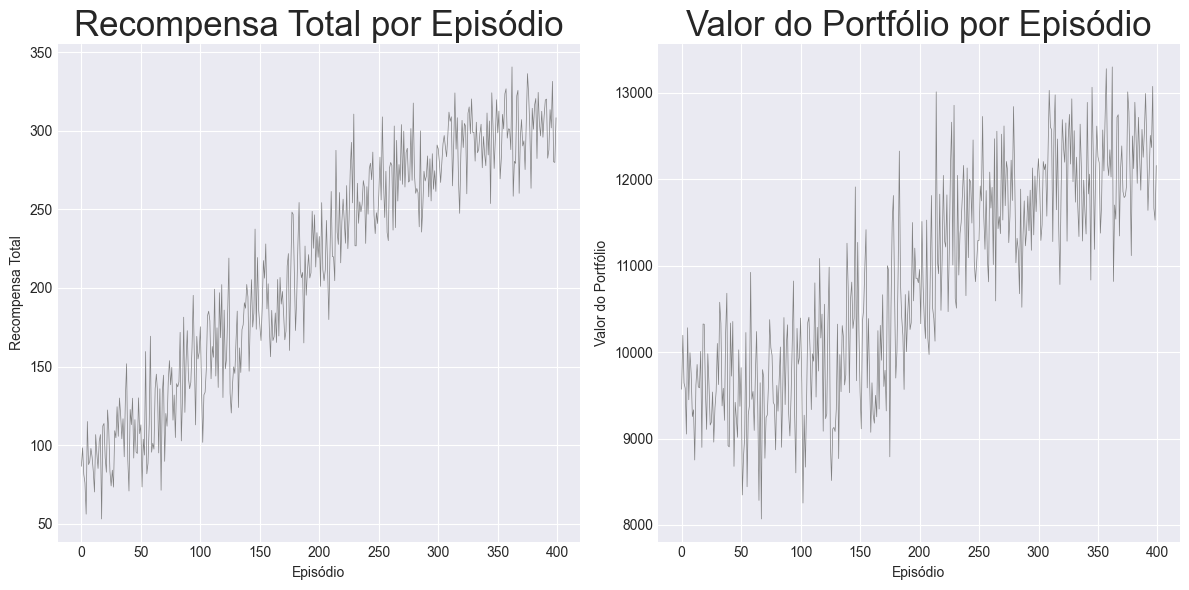

In [25]:
# Plotar as métricas
plt.figure(figsize=(12, 6))

# Gráfico de recompensa total por episódio
plt.subplot(1, 2, 1)
plt.plot(total_rewards_vale, color='gray', linewidth=0.5)
plt.title("Recompensa Total por Episódio", fontsize=25)
plt.xlabel("Episódio")
plt.ylabel("Recompensa Total")

# Gráfico do valor do portfólio ao longo dos episódios
plt.subplot(1, 2, 2)
plt.plot(portfolio_values_vale, color='gray', linewidth=0.5)
plt.title("Valor do Portfólio por Episódio", fontsize=25)
plt.xlabel("Episódio")
plt.ylabel("Valor do Portfólio")

plt.tight_layout()
plt.show()

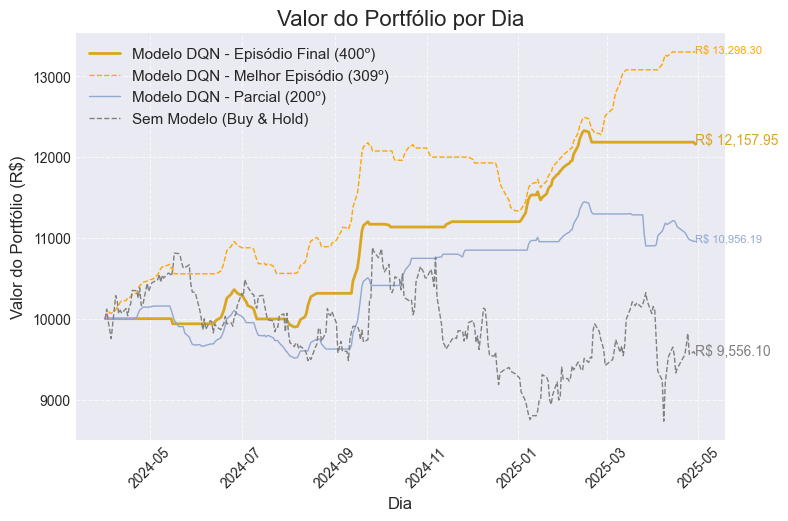

In [24]:
initial_balance = 10000
num_acoes = initial_balance / df_vale['Close'].iloc[0]
portfolio_values_real_vale = df_vale['Close'] * num_acoes

# Garantir que a coluna 'Date' está no formato datetime
df_vale['Date'] = pd.to_datetime(df_vale['Date'])

# Garantir que ambas as listas tenham o mesmo tamanho
min_length = min(len(last_daily_values_vale), len(portfolio_values_real_vale), len(df_vale['Date']))
last_daily_values_vale = last_daily_values_vale[:min_length]
portfolio_values_real_vale = portfolio_values_real_vale[:min_length]
dates = df_vale['Date'][:min_length]

# Estilo do gráfico
plt.style.use('seaborn-v0_8-darkgrid')  

# Plotando o gráfico
plt.figure(figsize=(8, 5))
plt.plot(dates, last_daily_values_vale, label=f'Modelo DQN - Episódio Final ({last_episodio}º)', color='#DAA520', linewidth=2, linestyle='-')
plt.plot(dates, max_daily_values_vale, label= f'Modelo DQN - Melhor Episódio ({max_episodio}º)', color='orange', linewidth=1, linestyle='--')
plt.plot(dates, mid_daily_values_vale, label=f'Modelo DQN - Parcial ({mid_episodio}º)', color='#91A8D0', linewidth=1, linestyle='-')
plt.plot(dates, portfolio_values_real_vale, label='Sem Modelo (Buy & Hold)', color='gray', linewidth=1, linestyle='--')

# Adicionando título e labels
plt.title("Valor do Portfólio por Dia", fontsize=16)
plt.xlabel("Dia", fontsize=12)
plt.ylabel("Valor do Portfólio (R$)", fontsize=12)

# Adicionando legendas e textos nos pontos finais
plt.legend(loc='best', fontsize=11)
plt.text(dates.iloc[-1], last_daily_values_vale[-1], f'R$ {last_daily_values_vale[-1]:,.2f}', color='#DAA520', fontsize=10)
plt.text(dates.iloc[-1], max_daily_values_vale[-1],  f'R$ {max_daily_values_vale[-1]:,.2f}',  color='orange',  fontsize=8)
plt.text(dates.iloc[-1], mid_daily_values_vale[-1],  f'R$ {mid_daily_values_vale[-1]:,.2f}',  color='#91A8D0', fontsize=8)
plt.text(dates.iloc[-1], portfolio_values_real_vale.iloc[-1], f'R$ {portfolio_values_real_vale.iloc[-1]:,.2f}', color='gray', fontsize=10)

# Adicionando a grade
plt.grid(True, linestyle='--', alpha=0.7)

# Ajustando layout e exibindo o gráfico
plt.tight_layout()
plt.xticks(rotation=45) 
plt.show()


## 5.2 Petrobras

In [15]:
import matplotlib.pyplot as plt

# Definir o tamanho do estado e da ação
state_size = 9  # Preço, saldo, ações
action_size = 3  # Comprar, vender, manter

# Criar o ambiente de negociação
env = TradingEnvironment(df_petro['preco_suavizado'], initial_balance=10000)

# Criar o agente
state = env.reset()
agent = DQNAgent(state_size, action_size)

# Listas para armazenar métricas
total_rewards = []  # Para armazenar recompensa total por episódio
portfolio_values = []  # Para armazenar o valor do portfólio no final de cada episódio

# Treinamento
episodes = 400
max_portfolio_value = 0
last_episodio = []
mid_episodio = []
max_episodio = []

for episode in range(episodes):
    state = env.reset()
    done = False
    episode_reward = 0  # Recompensa acumulada por episódio
    daily_values = []
    step_count = 0
    
    while not done:
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        agent.store_experience(state, action, reward, next_state, done)
        step_count += 1
        if step_count % 1 == 0:
            agent.train()
        state = next_state
        episode_reward += reward  # Acumulando a recompensa no episódio
        
        daily_values.append(env.portfolio_value)
    
    # Atualizar a exploração
    agent.update_epsilon()
    
    # Armazenar métricas
    total_rewards.append(episode_reward)
    portfolio_values.append(env.portfolio_value)
    
    if (episode + 1) % 10 == 0:
        print(f"Episode {episode + 1}/{episodes} completed with portfolio of {round(env.portfolio_value)}. Com sugestão de ação {action} e recompensa acumulada de {round(episode_reward,1)}.")
    
    # Armazenar o valor do portfólio diário para análise gráfica
    if episode == episodes - 1:
        last_daily_values = daily_values
        last_episodio = episode + 1
    
    if episode == (episodes)/2:
        mid_daily_values = daily_values
        mid_episodio = episode
    
    if daily_values[-1] >= max_portfolio_value:
        max_portfolio_value = daily_values[-1]
        max_episodio = episode + 1
        max_daily_values = daily_values

# Armazenar os valores finais
total_rewards_petro = total_rewards
portfolio_values_petro = portfolio_values
last_daily_values_petro = last_daily_values
mid_daily_values_petro = mid_daily_values
max_daily_values_petro = max_daily_values

Episode 10/400 completed with portfolio of 8907. Com sugestão de ação 0 e recompensa acumulada de 70.5.
Episode 20/400 completed with portfolio of 9456. Com sugestão de ação 1 e recompensa acumulada de 89.5.
Episode 30/400 completed with portfolio of 10137. Com sugestão de ação 2 e recompensa acumulada de 141.7.
Episode 40/400 completed with portfolio of 10100. Com sugestão de ação 0 e recompensa acumulada de 114.5.
Episode 50/400 completed with portfolio of 9881. Com sugestão de ação 1 e recompensa acumulada de 116.7.
Episode 60/400 completed with portfolio of 10297. Com sugestão de ação 0 e recompensa acumulada de 147.5.
Episode 70/400 completed with portfolio of 11353. Com sugestão de ação 1 e recompensa acumulada de 187.9.
Episode 80/400 completed with portfolio of 8793. Com sugestão de ação 0 e recompensa acumulada de 114.3.
Episode 90/400 completed with portfolio of 10800. Com sugestão de ação 0 e recompensa acumulada de 184.7.
Episode 100/400 completed with portfolio of 10276. C

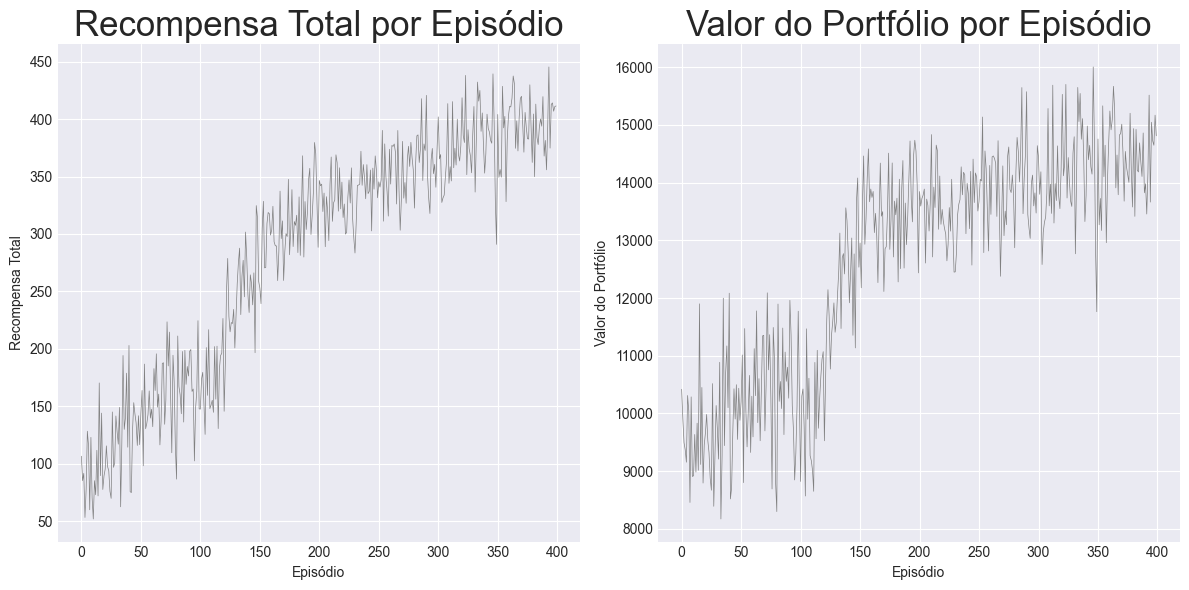

In [16]:
# Plotar as métricas
plt.figure(figsize=(12, 6))

# Gráfico de recompensa total por episódio
plt.subplot(1, 2, 1)
plt.plot(total_rewards_petro, color='gray', linewidth=0.5)
plt.title("Recompensa Total por Episódio", fontsize=25)
plt.xlabel("Episódio")
plt.ylabel("Recompensa Total")

# Gráfico do valor do portfólio ao longo dos episódios
plt.subplot(1, 2, 2)
plt.plot(portfolio_values_petro, color='gray', linewidth=0.5)
plt.title("Valor do Portfólio por Episódio", fontsize=25)
plt.xlabel("Episódio")
plt.ylabel("Valor do Portfólio")

plt.tight_layout()
plt.show()

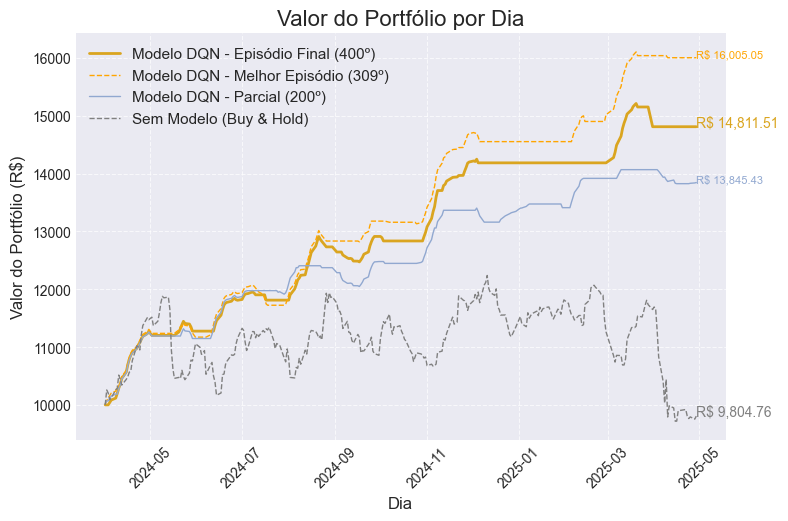

In [26]:
initial_balance = 10000
num_acoes = initial_balance / df_petro['Close'].iloc[0]
portfolio_values_real_petro = df_petro['Close'] * num_acoes

# Garantir que a coluna 'Date' está no formato datetime
df_petro['Date'] = pd.to_datetime(df_petro['Date'])

# Garantir que ambas as listas tenham o mesmo tamanho
min_length = min(len(last_daily_values_petro), len(portfolio_values_real_petro), len(df_petro['Date']))
last_daily_values_petro = last_daily_values_petro[:min_length]
portfolio_values_real_petro = portfolio_values_real_petro[:min_length]
dates = df_petro['Date'][:min_length]

# Estilo do gráfico
plt.style.use('seaborn-v0_8-darkgrid')  

# Plotando o gráfico
plt.figure(figsize=(8, 5))
plt.plot(dates, last_daily_values_petro, label=f'Modelo DQN - Episódio Final ({last_episodio}º)', color='#DAA520', linewidth=2, linestyle='-')
plt.plot(dates, max_daily_values_petro, label= f'Modelo DQN - Melhor Episódio ({max_episodio}º)', color='orange', linewidth=1, linestyle='--')
plt.plot(dates, mid_daily_values_petro, label=f'Modelo DQN - Parcial ({mid_episodio}º)', color='#91A8D0', linewidth=1, linestyle='-')
plt.plot(dates, portfolio_values_real_petro, label='Sem Modelo (Buy & Hold)', color='gray', linewidth=1, linestyle='--')

# Adicionando título e labels
plt.title("Valor do Portfólio por Dia", fontsize=16)
plt.xlabel("Dia", fontsize=12)
plt.ylabel("Valor do Portfólio (R$)", fontsize=12)

# Adicionando legendas e textos nos pontos finais
plt.legend(loc='best', fontsize=11)
plt.text(dates.iloc[-1], last_daily_values_petro[-1], f'R$ {last_daily_values_petro[-1]:,.2f}', color='#DAA520', fontsize=10)
plt.text(dates.iloc[-1], max_daily_values_petro[-1],  f'R$ {max_daily_values_petro[-1]:,.2f}',  color='orange',  fontsize=8)
plt.text(dates.iloc[-1], mid_daily_values_petro[-1],  f'R$ {mid_daily_values_petro[-1]:,.2f}',  color='#91A8D0', fontsize=8)
plt.text(dates.iloc[-1], portfolio_values_real_petro.iloc[-1], f'R$ {portfolio_values_real_petro.iloc[-1]:,.2f}', color='gray', fontsize=10)

# Adicionando a grade
plt.grid(True, linestyle='--', alpha=0.7)

# Ajustando layout e exibindo o gráfico
plt.tight_layout()
plt.xticks(rotation=45) 
plt.show()


## 5.3 BR Foods

In [18]:
import matplotlib.pyplot as plt

# Definir o tamanho do estado e da ação
state_size = 9  # Preço, saldo, ações
action_size = 3  # Comprar, vender, manter

# Criar o ambiente de negociação
env = TradingEnvironment(df_brfoods['preco_suavizado'], initial_balance=10000)

# Criar o agente
state = env.reset()
agent = DQNAgent(state_size, action_size)

# Listas para armazenar métricas
total_rewards = []  # Para armazenar recompensa total por episódio
portfolio_values = []  # Para armazenar o valor do portfólio no final de cada episódio

# Treinamento
episodes = 400
max_portfolio_value = 0
last_episodio = []
mid_episodio = []
max_episodio = []

for episode in range(episodes):
    state = env.reset()
    done = False
    episode_reward = 0  # Recompensa acumulada por episódio
    daily_values = []
    step_count = 0
    
    while not done:
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        agent.store_experience(state, action, reward, next_state, done)
        step_count += 1
        if step_count % 1 == 0:
            agent.train()
        state = next_state
        episode_reward += reward  # Acumulando a recompensa no episódio
        
        daily_values.append(env.portfolio_value)
    
    # Atualizar a exploração
    agent.update_epsilon()
    
    # Armazenar métricas
    total_rewards.append(episode_reward)
    portfolio_values.append(env.portfolio_value)
    
    if (episode + 1) % 10 == 0:
        print(f"Episode {episode + 1}/{episodes} completed with portfolio of {round(env.portfolio_value)}. Com sugestão de ação {action} e recompensa acumulada de {round(episode_reward,1)}.")
    
    # Armazenar o valor do portfólio diário para análise gráfica
    if episode == episodes - 1:
        last_daily_values = daily_values
        last_episodio = episode + 1
    
    if episode == (episodes)/2:
        mid_daily_values = daily_values
        mid_episodio = episode
    
    if daily_values[-1] >= max_portfolio_value:
        max_portfolio_value = daily_values[-1]
        max_episodio = episode + 1
        max_daily_values = daily_values

# Armazenar os valores finais
total_rewards_brfoods = total_rewards
portfolio_values_brfoods = portfolio_values
last_daily_values_brfoods = last_daily_values
mid_daily_values_brfoods = mid_daily_values
max_daily_values_brfoods = max_daily_values



Episode 10/400 completed with portfolio of 9256. Com sugestão de ação 0 e recompensa acumulada de 100.8.
Episode 20/400 completed with portfolio of 11652. Com sugestão de ação 1 e recompensa acumulada de 181.0.
Episode 30/400 completed with portfolio of 10465. Com sugestão de ação 2 e recompensa acumulada de 139.8.
Episode 40/400 completed with portfolio of 12625. Com sugestão de ação 1 e recompensa acumulada de 193.0.
Episode 50/400 completed with portfolio of 10185. Com sugestão de ação 0 e recompensa acumulada de 139.9.
Episode 60/400 completed with portfolio of 12878. Com sugestão de ação 2 e recompensa acumulada de 260.8.
Episode 70/400 completed with portfolio of 15577. Com sugestão de ação 2 e recompensa acumulada de 358.1.
Episode 80/400 completed with portfolio of 14396. Com sugestão de ação 1 e recompensa acumulada de 304.2.
Episode 90/400 completed with portfolio of 15641. Com sugestão de ação 1 e recompensa acumulada de 351.3.
Episode 100/400 completed with portfolio of 170

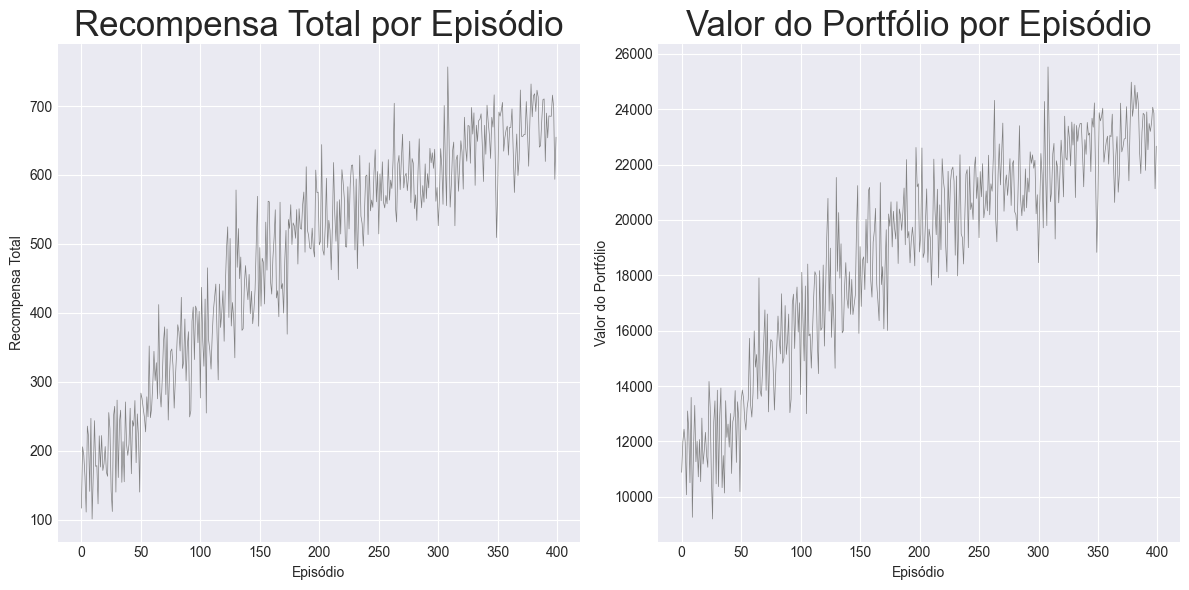

In [19]:
# Plotar as métricas
plt.figure(figsize=(12, 6))

# Gráfico de recompensa total por episódio
plt.subplot(1, 2, 1)
plt.plot(total_rewards_brfoods, color='gray', linewidth=0.5)
plt.title("Recompensa Total por Episódio", fontsize=25)
plt.xlabel("Episódio")
plt.ylabel("Recompensa Total")

# Gráfico do valor do portfólio ao longo dos episódios
plt.subplot(1, 2, 2)
plt.plot(portfolio_values_brfoods, color='gray', linewidth=0.5)
plt.title("Valor do Portfólio por Episódio", fontsize=25)
plt.xlabel("Episódio")
plt.ylabel("Valor do Portfólio")

plt.tight_layout()
plt.show()

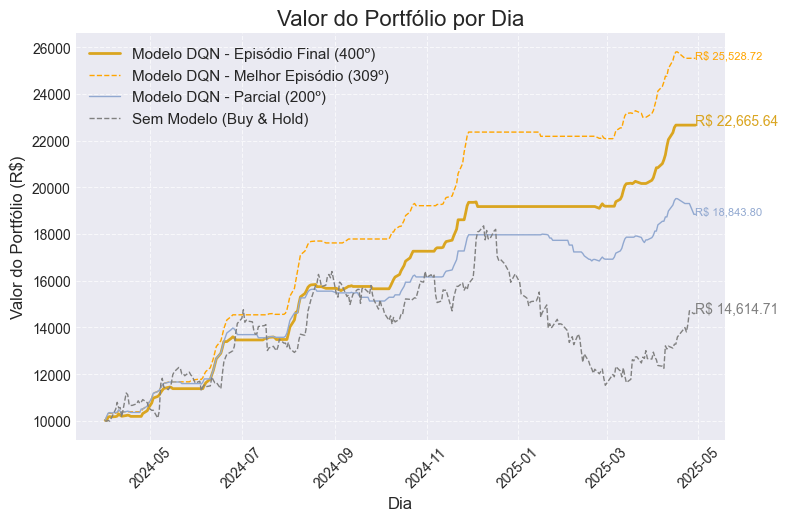

In [27]:
initial_balance = 10000
num_acoes = initial_balance / df_brfoods['Close'].iloc[0]
portfolio_values_real_brfoods = df_brfoods['Close'] * num_acoes

# Garantir que a coluna 'Date' está no formato datetime
df_brfoods['Date'] = pd.to_datetime(df_brfoods['Date'])

# Garantir que ambas as listas tenham o mesmo tamanho
min_length = min(len(last_daily_values_brfoods), len(portfolio_values_real_brfoods), len(df_brfoods['Date']))
last_daily_values_brfoods = last_daily_values_brfoods[:min_length]
portfolio_values_real_brfoods = portfolio_values_real_brfoods[:min_length]
dates = df_brfoods['Date'][:min_length]

# Estilo do gráfico
plt.style.use('seaborn-v0_8-darkgrid')  

# Plotando o gráfico
plt.figure(figsize=(8, 5))
plt.plot(dates, last_daily_values_brfoods, label=f'Modelo DQN - Episódio Final ({last_episodio}º)', color='#DAA520', linewidth=2, linestyle='-')
plt.plot(dates, max_daily_values_brfoods, label= f'Modelo DQN - Melhor Episódio ({max_episodio}º)', color='orange', linewidth=1, linestyle='--')
plt.plot(dates, mid_daily_values_brfoods, label=f'Modelo DQN - Parcial ({mid_episodio}º)', color='#91A8D0', linewidth=1, linestyle='-')
plt.plot(dates, portfolio_values_real_brfoods, label='Sem Modelo (Buy & Hold)', color='gray', linewidth=1, linestyle='--')

# Adicionando título e labels
plt.title("Valor do Portfólio por Dia", fontsize=16)
plt.xlabel("Dia", fontsize=12)
plt.ylabel("Valor do Portfólio (R$)", fontsize=12)

# Adicionando legendas e textos nos pontos finais
plt.legend(loc='best', fontsize=11)
plt.text(dates.iloc[-1], last_daily_values_brfoods[-1], f'R$ {last_daily_values_brfoods[-1]:,.2f}', color='#DAA520', fontsize=10)
plt.text(dates.iloc[-1], max_daily_values_brfoods[-1],  f'R$ {max_daily_values_brfoods[-1]:,.2f}',  color='orange',  fontsize=8)
plt.text(dates.iloc[-1], mid_daily_values_brfoods[-1],  f'R$ {mid_daily_values_brfoods[-1]:,.2f}',  color='#91A8D0', fontsize=8)
plt.text(dates.iloc[-1], portfolio_values_real_brfoods.iloc[-1], f'R$ {portfolio_values_real_brfoods.iloc[-1]:,.2f}', color='gray', fontsize=10)

# Adicionando a grade
plt.grid(True, linestyle='--', alpha=0.7)

# Ajustando layout e exibindo o gráfico
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

## 5.4 Geral

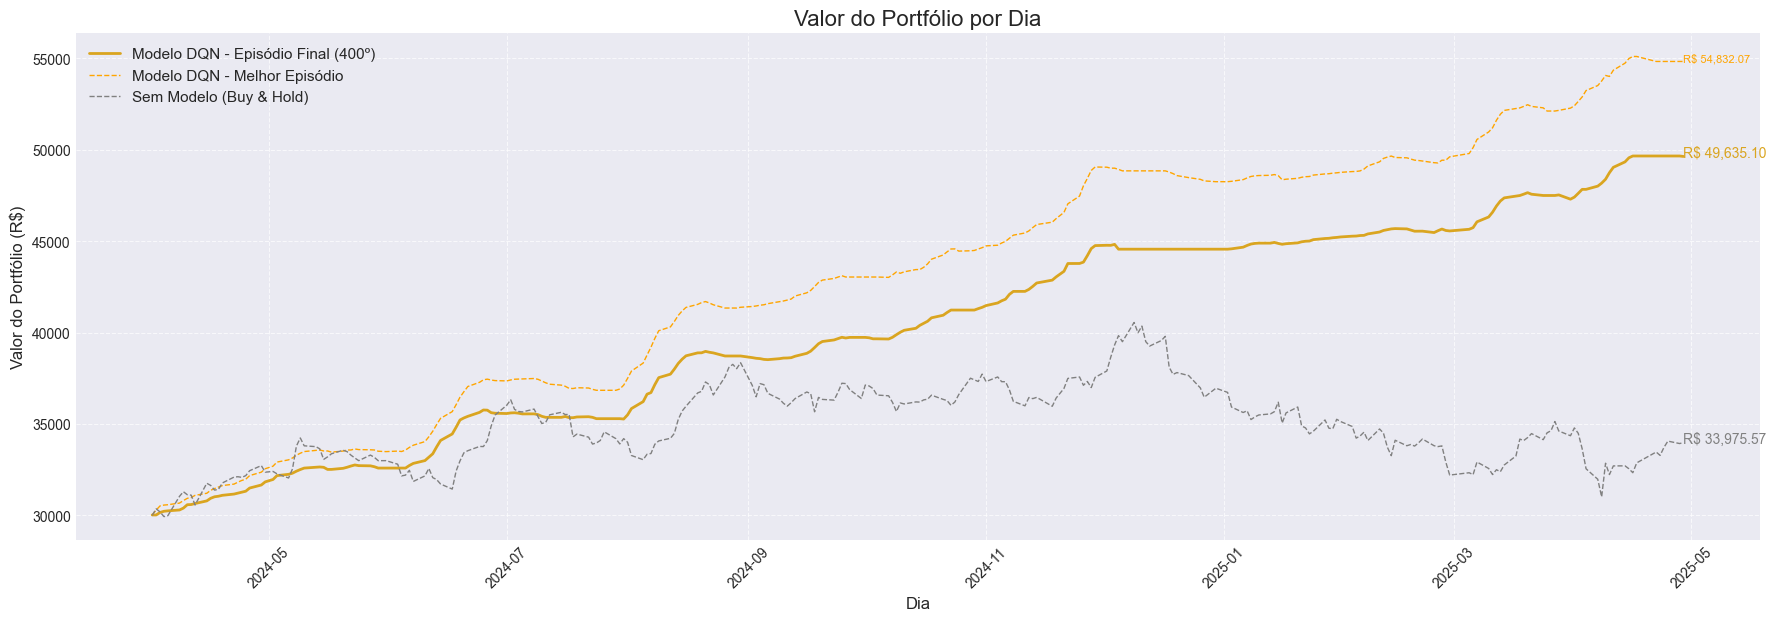

In [29]:
# Armazenar os valores finais
portfolio_values_real = portfolio_values_real_vale + portfolio_values_real_petro + portfolio_values_real_brfoods
last_daily_values = pd.Series(last_daily_values_vale) + pd.Series(last_daily_values_petro) + pd.Series(last_daily_values_brfoods)
max_daily_values = pd.Series(max_daily_values_vale) + pd.Series(max_daily_values_petro) + pd.Series(max_daily_values_brfoods)


# Garantir que a coluna 'Date' está no formato datetime
df_brfoods['Date'] = pd.to_datetime(df_brfoods['Date'])

# Garantir que ambas as listas tenham o mesmo tamanho
min_length = min(len(last_daily_values), len(portfolio_values_real), len(df_brfoods['Date']))
last_daily_values = last_daily_values[:min_length]
portfolio_values_real = portfolio_values_real[:min_length]
dates = df_brfoods['Date'][:min_length]

# Estilo do gráfico
plt.style.use('seaborn-v0_8-darkgrid')  

# Plotando o gráfico
plt.figure(figsize=(18, 6))
plt.plot(dates, last_daily_values, label=f'Modelo DQN - Episódio Final (400º)', color='#DAA520', linewidth=2, linestyle='-')
plt.plot(dates, max_daily_values, label= f'Modelo DQN - Melhor Episódio', color='orange', linewidth=1, linestyle='--')
plt.plot(dates, portfolio_values_real, label='Sem Modelo (Buy & Hold)', color='gray', linewidth=1, linestyle='--')

# Adicionando título e labels
plt.title("Valor do Portfólio por Dia", fontsize=16)
plt.xlabel("Dia", fontsize=12)
plt.ylabel("Valor do Portfólio (R$)", fontsize=12)

# Adicionando legendas e textos nos pontos finais
plt.legend(loc='best', fontsize=11)
plt.text(dates.iloc[-1], last_daily_values.iloc[-1], f'R$ {last_daily_values.iloc[-1]:,.2f}', color='#DAA520', fontsize=10)
plt.text(dates.iloc[-1], max_daily_values.iloc[-1],  f'R$ {max_daily_values.iloc[-1]:,.2f}',  color='orange',  fontsize=8)
plt.text(dates.iloc[-1], portfolio_values_real.iloc[-1], f'R$ {portfolio_values_real.iloc[-1]:,.2f}', color='gray', fontsize=10)

# Adicionando a grade
plt.grid(True, linestyle='--', alpha=0.7)

# Ajustando layout e exibindo o gráfico
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


# 6. Conclusão

# Discussão dos Resultados Obtidos

---

## Visão Geral

A seguir, comparamos o desempenho do agente DQN com a estratégia tradicional de **Buy & Hold** para três ativos individuais (Vale, Petrobrás e BR Foods) e para a carteira consolidada. Avaliamos o valor final dos portfólios após o episódio 400 (último episódio do treinamento) e no episódio de melhor desempenho para cada caso.

---

## Resultados por Ativo

| Ativo       | Buy & Hold (R$) | Episódio Final (R$) | Crescimento (%) | Melhor Episódio (R$) | Crescimento (%) |
|-------------|-----------------|----------------------|------------------|------------------------|------------------|
| **Vale**    | 9.556,10        | 12.157,95            | +27,26%          | 13.298,30              | +39,18%          |
| **Petrobrás**| 9.804,76       | 14.811,51            | +51,09%          | 16.005,05              | +63,25%          |
| **BR Foods**| 14.789,29       | 22.665,64            | +53,28%          | 25.528,72              | +72,59%          |

 **Observações:**
 - O agente DQN superou o desempenho do Buy & Hold em todos os ativos.
 - O maior ganho percentual ocorreu em **BR Foods**, com um crescimento de até **+72,59%** no melhor episódio.
 - Mesmo no episódio final, o agente manteve ganhos superiores a **+27%** em todos os ativos.

---

## Resultados da Carteira Consolidada

| Carteira (Todas as Ações) | Buy & Hold (R$) | Episódio Final (R$) | Crescimento (%) | Melhor Episódio (R$) | Crescimento (%) |
|---------------------------|------------------|----------------------|------------------|------------------------|------------------|
|                           | 33.975,57        | 49.635,10            | +46,09%          | 54.832,07              | +61,44%          |

 **Observações:**
 - A performance da carteira treinada com DQN mais que **duplicou os retornos absolutos** do Buy & Hold.
 - O portfólio consolidado teve um ganho de **+61,44%** no melhor episódio e **+46,09%** ao final do treinamento, reforçando a consistência do modelo.

---

## Conclusões

- **Eficiência Aprendida:** O agente DQN demonstrou ser significativamente mais eficiente do que a estratégia passiva, aprendendo políticas que maximizaram o valor do portfólio ao longo do tempo.
- **Estabilidade vs. Picos:** Embora o melhor episódio apresente o maior ganho, o desempenho consistente no episódio final evidencia uma boa **generalização** do agente ao longo do tempo.
- **Potencial do DQN:** A utilização de aprendizado por reforço para tomada de decisão em trading se mostra promissora, com retornos expressivamente superiores à estratégia de Buy & Hold.
- **Próximos passos:** Melhorias adicionais podem incluir:
  - Otimização de hiperparâmetros;
  - Adoção de arquiteturas mais profundas;
  - Inclusão de mais variáveis no estado do ambiente (como indicadores técnicos);
  - Testes em períodos de mercado diferentes e com diferentes níveis de volatilidade.

---

**Resumo:**  
O agente DQN apresentou entre **+27% e +72% de valorização adicional** em relação ao Buy & Hold nos ativos analisados, e um aumento de **até +61% na carteira consolidada**, confirmando seu potencial como ferramenta para estratégias de negociação mais inteligentes e adaptativas.
